<center><h2>NLP Project....Urdu_Classification_Model</h2></center>

### Step 1: Import  Libraries

In [1]:
### Import Libraries

import re
import os 
import csv
import scipy
import nltk
import string
import pickle
import warnings
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from wordcloud import WordCloud
import textstat as ts

from sklearn.feature_extraction.text import *
from string import *
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support,accuracy_score
from sklearn.datasets import load_files
from joblib import dump, load
from collections import Counter
from joblib import dump, load

from sklearn import preprocessing
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.datasets import make_classification


from sklearn.decomposition import PCA, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_curve, auc
from sklearn.model_selection import cross_validate, cross_val_score, train_test_split, StratifiedKFold
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

from sklearn.ensemble import  GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

from prettytable import PrettyTable   
from astropy.table import Table, Column

from sklearn.utils import shuffle # to shuffle all files in dataframe
from nltk.corpus import stopwords

In [2]:
# importing neural network libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, GRU, LSTM, RNN, SpatialDropout1D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM


In [3]:
import fnmatch
Real = "C:\\Users\\Husnain Rafiq\\Desktop\\project\\NLP Project\\Train\\Real\\"
Fake = "C:\\Users\\Husnain Rafiq\\Desktop\\project\\NLP Project\\Train\\Fake\\"
real_bus = len(fnmatch.filter(os.listdir(Real), 'bus*.txt'))
fake_bus = len(fnmatch.filter(os.listdir(Fake), 'bus*.txt'))
total_bus = real_bus + fake_bus
print('Real Business =',real_bus,'Fake Business =',fake_bus, 'Total Business =',total_bus, '\n')

real_hlth = len(fnmatch.filter(os.listdir(Real), 'hlth*.txt'))
fake_hlth = len(fnmatch.filter(os.listdir(Fake), 'hlth*.txt'))
total_hlth = real_hlth + fake_hlth
print('Real Health =',real_hlth,'Fake Health =',fake_hlth, 'Total Health =',total_hlth, '\n')

real_sbz = len(fnmatch.filter(os.listdir(Real), 'sbz*.txt'))
fake_sbz = len(fnmatch.filter(os.listdir(Fake), 'sbz*.txt'))
total_sbz = real_sbz + fake_sbz
print('Real Entertainment =',real_sbz,'Fake Entertainment =',fake_sbz, 'Total Entertainment =',total_sbz, '\n')

real_sp = len(fnmatch.filter(os.listdir(Real), 'sp*.txt'))
fake_sp = len(fnmatch.filter(os.listdir(Fake), 'sp*.txt'))
total_sp = real_sp + fake_sp
print('Real Sports =',real_sp,'Fake Sports =',fake_sp, 'Total Sports =',total_sp, '\n')

real_tch = len(fnmatch.filter(os.listdir(Real), 'tch*.txt'))
fake_tch = len(fnmatch.filter(os.listdir(Fake), 'tch*.txt'))
total_tch = real_tch + fake_tch
print('Real Technology =',real_tch,'Fake Technology =',fake_tch, 'Total Technology =',total_tch)


Real Business = 100 Fake Business = 50 Total Business = 150 

Real Health = 100 Fake Health = 100 Total Health = 200 

Real Entertainment = 100 Fake Entertainment = 100 Total Entertainment = 200 

Real Sports = 100 Fake Sports = 50 Total Sports = 150 

Real Technology = 100 Fake Technology = 100 Total Technology = 200


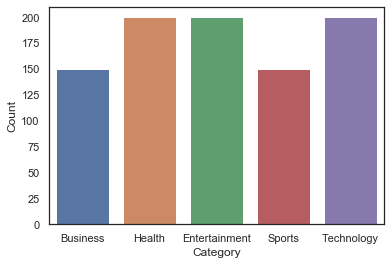

In [4]:
Category = ['Business', 'Health', 'Entertainment', 'Sports', 'Technology']
Count = [150, 200, 200, 150, 200]
df = pd.DataFrame(dict(Category=Category, Count=Count))
import seaborn as sns
sns.set(style="white")
# plt.figure(figsize=(4,6))
ax = sns.barplot(x="Category", y= "Count", data=df)
plt.show()

### Read the Urdu News Dataset

In [5]:
#### Read the Urdu News Dataset

print("Urdu News Dataset:")
print("====================\n")
news_dataset = pd.read_csv('urdu_news_dataset.csv')

news_dataset.head()

Urdu News Dataset:



,News,Label
0,\r\nترکی کی جانب سے ایران سے تیل کی خریداری با...,1
1,ہالینڈ (ویب ڈیسک ) اب صرف جلد پر روشنی ڈال کر ...,0
2,\r\nکراچی (کامرس ڈیسک) آٹو انڈسٹری کی عالمی ش...,1
3,\r\n\r\nچین اور امریکہ کی جانب سے ایک دوسرے کے...,0
4,لاہور (ویب ڈیسک) زندگی کے کسی بھی مرحلے پر پیا...,1


### Different Classes in Dataset

In [6]:
### Different Classes in Dataset
data_classes = ["Fake", "Real"]
d = dict(zip(data_classes, range(0,2)))
d

{'Fake': 0, 'Real': 1}

### Change the numaric labels to categorial for better Understanding

In [7]:
urdu_news_dataset = news_dataset.copy()
urdu_news_dataset.Label[urdu_news_dataset.Label == 0] = 'Fake'
urdu_news_dataset.Label[urdu_news_dataset.Label == 1] = 'Real'
# urdu_news_dataset1=urdu_news_dataset
urdu_news_dataset.head()

C:\Users\Husnain Rafiq\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,News,Label
0,\r\nترکی کی جانب سے ایران سے تیل کی خریداری با...,Real
1,ہالینڈ (ویب ڈیسک ) اب صرف جلد پر روشنی ڈال کر ...,Fake
2,\r\nکراچی (کامرس ڈیسک) آٹو انڈسٹری کی عالمی ش...,Real
3,\r\n\r\nچین اور امریکہ کی جانب سے ایک دوسرے کے...,Fake
4,لاہور (ویب ڈیسک) زندگی کے کسی بھی مرحلے پر پیا...,Real


In [8]:
urdu_news_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 2 columns):
News     900 non-null object
Label    900 non-null object
dtypes: object(2)
memory usage: 14.1+ KB


### Understanding and Visualizations of data through Graphs

In [9]:
### Understanding of data
print("Real News in dataset:\n=====================\n")
real_dataset=(urdu_news_dataset.loc[urdu_news_dataset['Label'] == 'Real'])
print(real_dataset.head())

print("\nTotal Number of Real Instances in dataset:\n==========================================")
print("Total Real Instances : "+str(len(real_dataset))) 

print("\n\nFake News in dataset:\n=====================\n")
fake_dataset=(urdu_news_dataset.loc[urdu_news_dataset['Label'] == 'Fake'])
print(fake_dataset.head())
print("\nTotal Number of Fake Instances in dataset:\n==========================================")
print("Total Fake Instances : "+str(len(fake_dataset))) 

Real News in dataset:

                                                News Label
0  \r\nترکی کی جانب سے ایران سے تیل کی خریداری با...  Real
2  \r\nکراچی (کامرس ڈیسک) آٹو انڈسٹری کی عالمی ش...  Real
4  لاہور (ویب ڈیسک) زندگی کے کسی بھی مرحلے پر پیا...  Real
5  لاہور(ویب ڈیسک) فریزر کا استعمال برف جمانے کے ...  Real
6  اس بڑے پیمانے پر پر ائیویسی نقائص سے 52 ملین ص...  Real

Total Number of Real Instances in dataset:
Total Real Instances : 500


Fake News in dataset:

                                                 News Label
1   ہالینڈ (ویب ڈیسک ) اب صرف جلد پر روشنی ڈال کر ...  Fake
3   \r\n\r\nچین اور امریکہ کی جانب سے ایک دوسرے کے...  Fake
7   ﻿اسلام آباد(نیو زڈیسک)چینی سائنسدانوں نے چاند...  Fake
9   جکارتہ 23 اگست (سیاست ڈاٹ کام) ہندوستان کی اسٹ...  Fake
11                  \r\nلندن (مانیٹرنگ ڈیسک) دانوں...  Fake

Total Number of Fake Instances in dataset:
Total Fake Instances : 400


### Count Average Length of the Text 

In [10]:
"""
A utility function to calculate the avg. length of the text (in number of words.)

"""

def avg_text_length(dataframe):
    rowCounts = [len(x.split()) for x in dataframe["News"].tolist()]
    avgCount = sum(rowCounts)//len(rowCounts)
    
    return avgCount

In [11]:
print("Avg. text length for true news: {}".format(avg_text_length(real_dataset)))
print("Avg. text length for fake news: {}".format(avg_text_length(fake_dataset)))

Avg. text length for true news: 372
Avg. text length for fake news: 300


### Visualizations of data through Graphs

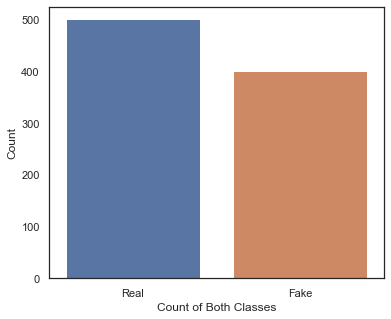

In [12]:
plt.figure(figsize=(6,5))
sns.set(style="white")
ax = sns.countplot(x="Label", data=urdu_news_dataset)
ax.set_xticklabels(['Real', 'Fake'])
plt.xlabel('Count of Both Classes')
plt.ylabel('Count')
plt.show()


Total number of instances in Dataset:



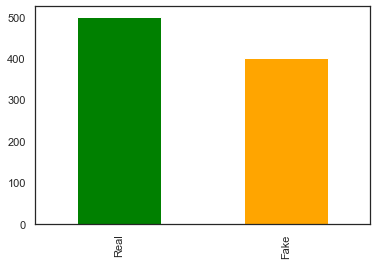

In [13]:
### Visualizations of data
print("\nTotal number of instances in Dataset:\n=====================================\n")
#urdu_news_dataset['Label'].value_counts().plot(kind='bar', color= ["#09087F" , "orange", "green", "#D53222"]);
urdu_news_dataset['Label'].value_counts().plot(kind='bar', color= ["green", "orange"]);

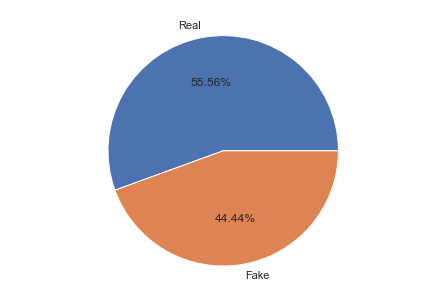

In [14]:
### Visualizations of data
positive_counts = len(urdu_news_dataset[urdu_news_dataset['Label']=='Real'])
negative_counts = len(urdu_news_dataset[urdu_news_dataset['Label']=='Fake'])
fig = plt.figure()

# fig.suptitle('\nPerformance of Various Classifiers', fontsize=15)
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Real', 'Fake']
nums = [positive_counts,negative_counts]
ax.pie(nums, labels = labels ,autopct='%1.2f%%')
plt.show()

In [15]:
urdu_news_dataset['News_length'] = urdu_news_dataset['News'].apply(lambda x : len(x.strip().split()))
# data_df['text_length'] = data_df['text'].apply(lambda x : len(x.strip().split()))

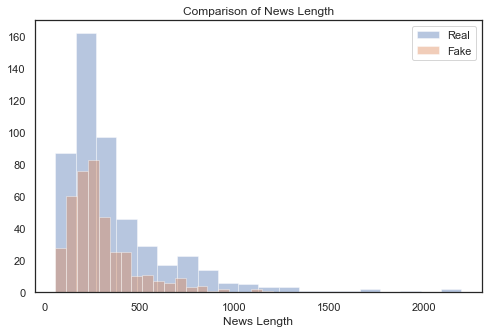

In [16]:
plt.figure(figsize=(8,5))
sns.set(style="white")
sns.distplot(urdu_news_dataset[urdu_news_dataset['Label'] == 'Real']['News_length'], 
             kde=False, label='Real', bins=20)
sns.distplot(urdu_news_dataset[urdu_news_dataset['Label'] == 'Fake']['News_length'], 
             kde=False, label='Fake', bins=20)
plt.xlabel('News Length')
plt.title('Comparison of News Length', fontsize=12)
plt.legend()
plt.show()

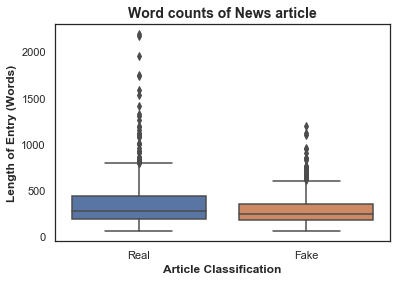

In [17]:
fig = plt.figure(figsize=(6, 4))
plt.title("Word counts of News article", fontsize=14, weight='bold')
ax = sns.boxplot(x="Label", y="News_length", data=urdu_news_dataset)
ax.set_xticklabels(['Real', 'Fake'])
ax.set_xlabel("Article Classification", fontsize=12, weight='bold') 
ax.set_ylabel("Length of Entry (Words)", fontsize=12, weight='bold')
plt.show()

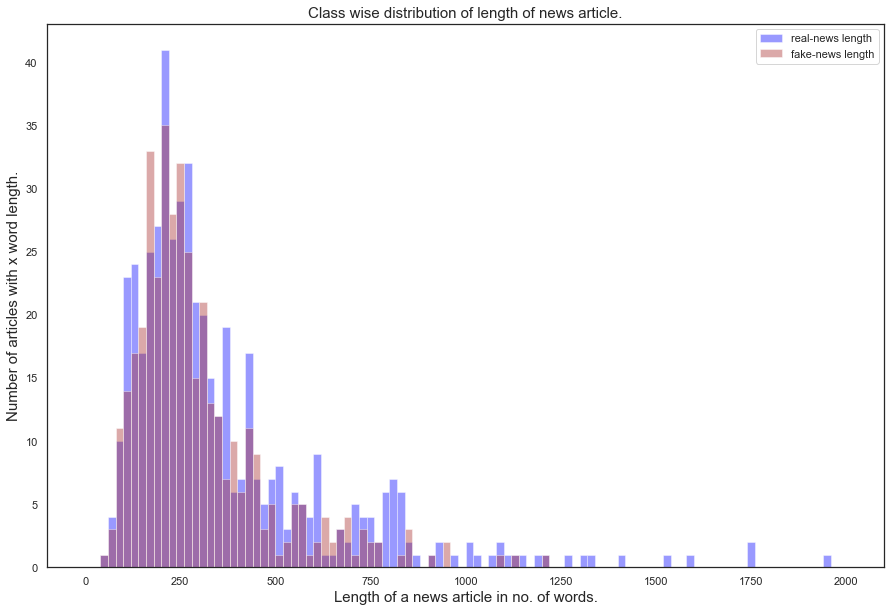

In [18]:
# Plotting the histogram for meaningful insights.

true_lengths = pd.Series([len(x.split()) for x in real_dataset["News"].tolist()])
fake_lengths = pd.Series([len(x.split()) for x in fake_dataset["News"].tolist()])

plt.figure(figsize = (15,10))
sns.distplot(true_lengths, bins = 100, color = "blue", kde=False, label = "real-news length", hist_kws={"range": [0,2000]})
sns.distplot(fake_lengths, bins = 100, color = "brown", kde=False, label = "fake-news length", hist_kws={"range": [0,2000]})
plt.xlabel("Length of a news article in no. of words.", fontsize = 15)
plt.ylabel("Number of articles with x word length.", fontsize = 15)
plt.title("Class wise distribution of length of news article.", fontsize = 15)
plt.legend()
plt.show()

## Top words in Fake and True Articles

In [19]:
from collections import Counter, defaultdict
def create_corpus(text_data):
    corpus = []
    for sentence in text_data:
        for word in sentence.split():
            corpus.append(word)
    return corpus
            
def top_words(text_corpus, top_n=25, return_dict=False):
    def_dict = defaultdict(int)
    for word in text_corpus:
        def_dict[word] += 1
    most_common = sorted(def_dict.items(), key=lambda x : x[1], reverse=True)[:top_n]
    if return_dict:
        return most_common, def_dict
    else:    
        return most_common

### Top Fake Articles Words

In [20]:
top_n = 50
text_field = "News"

fake_corpus = create_corpus(fake_dataset[text_field].values)
fake_top_n_words, fake_symptom_dict = top_words(fake_corpus, top_n=top_n, return_dict=True)
fake_words, fake_word_counts = zip(*fake_top_n_words)

def plot_words(word_list, word_counts, n, text_description, figsize=(15,5)):
    plt.figure(figsize=figsize)
    plt.xticks(rotation=90)
    plt.bar(word_list, word_counts)
    plt.title(f"Top {n} words in {text_description}", fontsize=14)
    plt.ylabel("Word Count")
    plt.show()

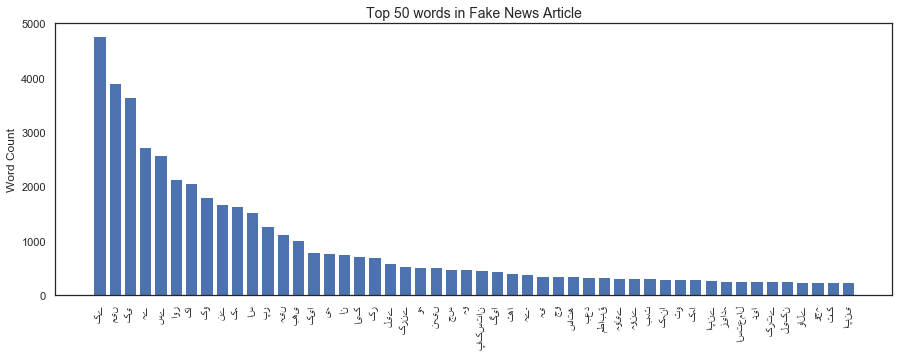

Total unique words in Fake News: 12825


In [21]:
plot_words(fake_words, fake_word_counts, 50, "Fake News Article")
print(f"Total unique words in Fake {text_field}: {len(fake_symptom_dict)}")

### Top Real Articles Words

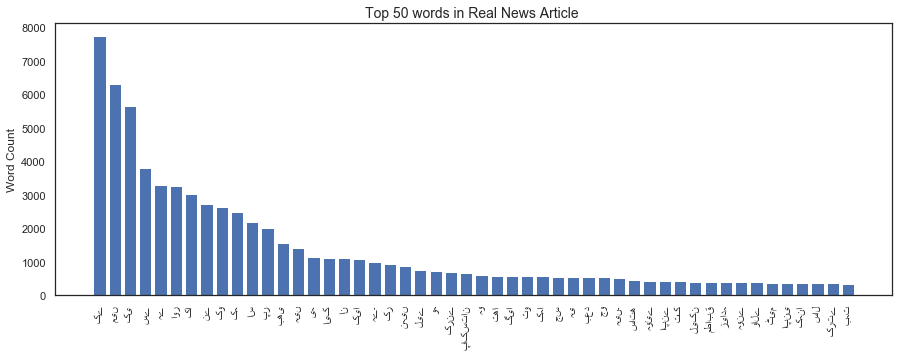

Total unique words in Real News: 17231


In [22]:
top_n = 50
text_field = "News"

true_corpus = create_corpus(real_dataset[text_field].values)
true_top_n_words, true_symptom_dict = top_words(true_corpus, top_n=top_n, return_dict=True)
true_words, true_word_counts = zip(*true_top_n_words)

plot_words(true_words, true_word_counts, 50, "Real News Article ")
print(f"Total unique words in Real {text_field}: {len(true_symptom_dict)}")

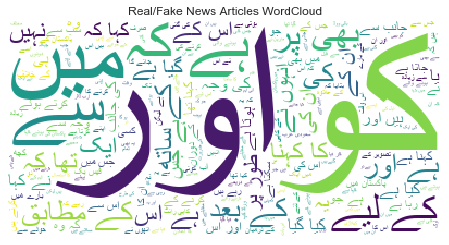

In [23]:
from bidi.algorithm import get_display
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import arabic_reshaper # this was missing in your code

# os.chdir("C:")
f = open('urdu_news_dataset.csv', 'r', encoding='utf-8')

df= f.read()
# df  = pd.Series(x)
data = arabic_reshaper.reshape(df)
data = get_display(data) # add this line
WordCloud = WordCloud(background_color="white",font_path='arial', mode='RGB').generate(data)
plt.figure(figsize=(8, 4))
plt.title("Real/Fake News Articles WordCloud", fontsize=12)
plt.imshow(WordCloud)
plt.axis("off")
plt.show()

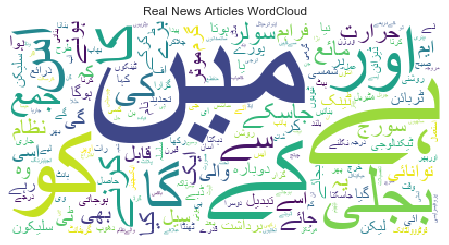

In [24]:
from bidi.algorithm import get_display
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import arabic_reshaper # this was missing in your code

Real = "C:\\Users\\Husnain Rafiq\\Desktop\\project\\NLP Project\\Train\\Real\\"
filesReal = []

for i in os.listdir(Real):
    if i.endswith('.txt'):
        real_f = open(Real + i, 'r', encoding='utf-8')
# os.chdir("C:")
# f = open('urdu_news_dataset.csv', 'r', encoding='utf-8')

real_df= real_f.read()
# df  = pd.Series(x)
data = arabic_reshaper.reshape(real_df)
data = get_display(data) # add this line
WordCloud = WordCloud(background_color="white",font_path='arial', mode='RGB').generate(data)
plt.figure(figsize=(8, 4))
plt.title("Real News Articles WordCloud", fontsize=12)
plt.imshow(WordCloud)
plt.axis("off")
plt.show()

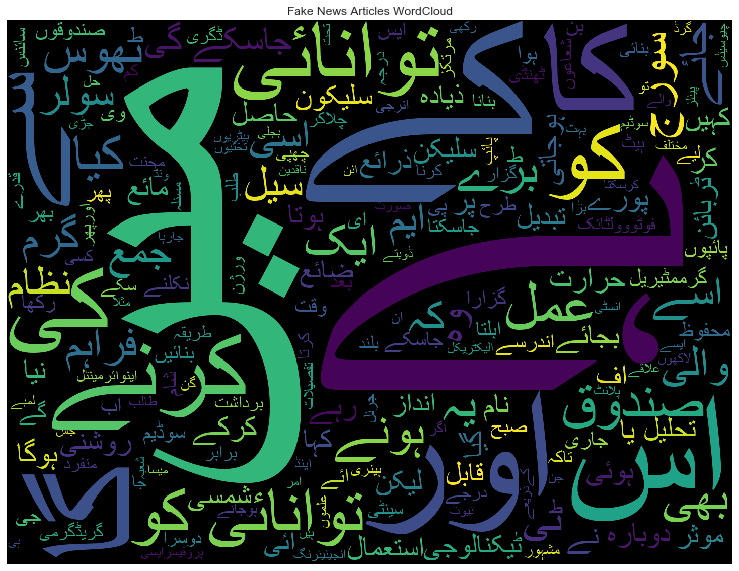

In [25]:
from bidi.algorithm import get_display
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import arabic_reshaper # this was missing in your code
Fake = "C:\\Users\\Husnain Rafiq\\Desktop\\project\\NLP Project\\Train\\Fake\\"
filesFake = []
for i in os.listdir(Fake):
    if i.endswith('.txt'):
        fake_f = open(Fake + i, 'r', encoding='utf-8')
fake_df= fake_f.read()

fake_data = arabic_reshaper.reshape(fake_df)
fake_data = get_display(fake_data) # add this line
WordCloud = WordCloud(font_path='arial', mode='RGB', width=1440, height=1080).generate(fake_data)
plt.figure(figsize=(15, 10))
plt.title("Fake News Articles WordCloud")
plt.imshow(WordCloud)
plt.axis("off")
plt.show()

In [26]:
true_news_readability = []
fake_news_readability = []

for sentence in real_dataset["News"].tolist():
    temp = ts.flesch_reading_ease(sentence)
    true_news_readability.append(temp)
    
for sentence in fake_dataset["News"].tolist():
    temp = ts.flesch_reading_ease(sentence)
    fake_news_readability.append(temp)

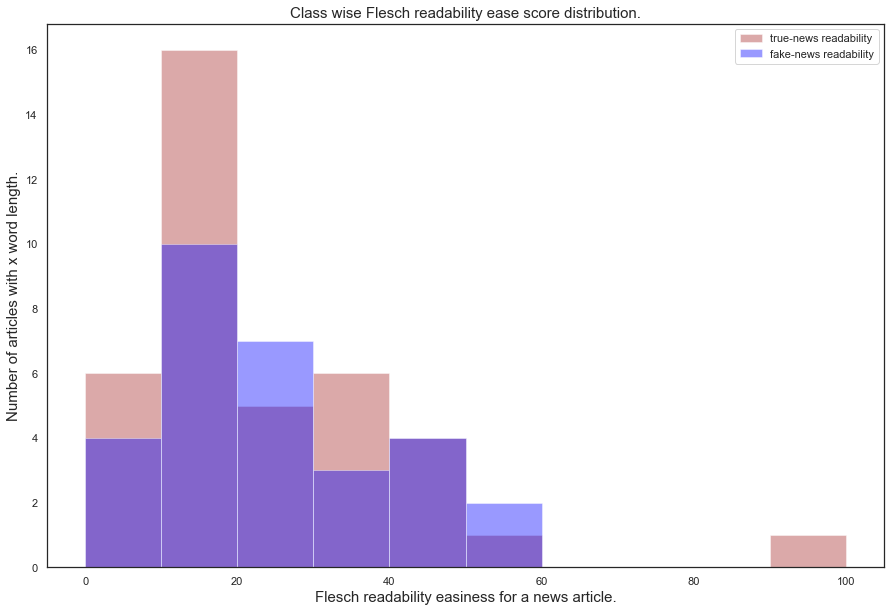

In [27]:
true_readability_df = pd.Series(true_news_readability)
fake_readability_df = pd.Series(fake_news_readability)

plt.figure(figsize = (15,10))
sns.distplot(true_readability_df, bins = 10, hist_kws={"range": [0,100]}, kde=False, color = "brown", label = "true-news readability")
sns.distplot(fake_readability_df, bins = 10, hist_kws={"range": [0,100]}, kde=False, color = "blue", label = "fake-news readability")
plt.xlabel("Flesch readability easiness for a news article.", fontsize = 15)
plt.ylabel("Number of articles with x word length.", fontsize = 15)
plt.title("Class wise Flesch readability ease score distribution.", fontsize = 15)
plt.legend()
plt.show()

### Text Cleaning and Pre-processing

In [28]:
# text cleaning and pre-processing:
news_sentences = news_dataset['News'].tolist()
news_labels = news_dataset['Label'].tolist()


def delete_urdu_english_symbols(news_sentences):
    cleaned = []
    for News in news_sentences:
        text = re.sub(r"\d+", " ", News)
        # English punctuations
        text = re.sub(r"""[!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~]+""", " ", text)
        # Urdu punctuations
        text = re.sub(r"[:؛؟’‘٭ء،۔]+", " ", text)
        # Arabic numbers
        text = re.sub(r"[٠‎١‎٢‎٣‎٤‎٥‎٦‎٧‎٨‎٩]+", " ", text)
        text = re.sub(r"[^\w\s]", " ", text)
        # Remove English characters and numbers.
        text = re.sub(r"[a-zA-z0-9]+", " ", text)
        # remove multiple spaces.
        text = re.sub(r" +", " ", text)
        text = text.split(" ")
        # some stupid empty tokens should be removed.
        text = [t.strip() for t in text if t.strip()]
        cleaned.append(" ".join(text))
    return cleaned

X = delete_urdu_english_symbols(news_sentences)
Y = news_labels

### Lemmatization

In [29]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [30]:
## Noun lemmatization
lemmatizer.lemmatize('پابندیوں')

'پابندیوں'

In [31]:
## Verb lemmatization
lemmatizer.lemmatize('خریدا تھا',pos='v')

'خریدا تھا'

### Tokenization

In [32]:
nltk.word_tokenize(news_dataset["News"][0])

['ترکی',
 'کی',
 'جانب',
 'سے',
 'ایران',
 'سے',
 'تیل',
 'کی',
 'خریداری',
 'بالکل',
 'ختم',
 'ہوکر',
 'رہ',
 'گئی',
 'ہے',
 'ایران',
 'سے',
 'تیل',
 'خریدنے',
 'والی',
 'ترک',
 'آئل',
 'کمپنی',
 'توبراش',
 'نے',
 'اکتوبر',
 'میں',
 'ایران',
 'سے',
 '1',
 'لاکھ',
 '29',
 'ہزار',
 'بیرل',
 'تیل',
 'خریدا',
 'تھا',
 'مگر',
 'نومبر',
 'میں',
 'یہ',
 'مقدار',
 'صفر',
 'رہی',
 'تفصیلات',
 'کے',
 'مطابق',
 'ترکی',
 'ان',
 'آٹھ',
 'ممالک',
 'میں',
 'شامل',
 'ہے',
 'جنہیں',
 'امریکا',
 'نے',
 'تہران',
 'پر',
 'پابندیوں',
 'کے',
 'دوران',
 'ایران',
 'سے',
 'محدود',
 'پیمانے',
 'پر',
 'تجارتی',
 'تعلقات',
 'اور',
 'تیل',
 'کی',
 'خریداری',
 'کی',
 'اجازت',
 'دی',
 'تھی',
 'امریکا',
 'نے',
 'پانچ',
 'نومبرکو',
 'ایران',
 'پر',
 'مزید',
 'اقتصادی',
 'پابندیاں',
 'عاید',
 'کی',
 'تھیں',
 'جن',
 'میں',
 'ایرانی',
 'تیل',
 'اور',
 'توانائی',
 'کے',
 'شعبوں',
 'کو',
 'خاص',
 'طور',
 'پر',
 'ہدف',
 'بنایا',
 'گیا',
 'تھا',
 'ایرانی',
 'وزیر',
 'برائے',
 'پٹرولیم',
 'بیجن',
 'زنگنہ',
 'نے',
 'گزشتہ',
 

In [33]:
nltk.sent_tokenize(news_dataset["News"][0])

['\r\nترکی کی جانب سے ایران سے تیل کی خریداری بالکل ختم ہوکر رہ گئی ہے ایران سے تیل خریدنے والی ترک آئل کمپنی توبراش نے اکتوبر میں ایران سے 1 لاکھ 29 ہزار بیرل تیل خریدا تھا مگر نومبر میں یہ مقدار صفر رہی  تفصیلات کے مطابق ترکی ان آٹھ ممالک میں شامل ہے جنہیں امریکا نے تہران پر پابندیوں کے دوران ایران سے محدود پیمانے پر تجارتی تعلقات اور تیل کی خریداری کی اجازت دی تھی امریکا نے پانچ نومبرکو ایران پر مزید اقتصادی پابندیاں عاید کی تھیں جن میں ایرانی تیل اور توانائی کے شعبوں کو خاص طور پر ہدف بنایا گیا تھا ایرانی وزیر برائے پٹرولیم بیجن زنگنہ نے گزشتہ روز ایک بیان میں کہا کہ دشمن کے ساتھ ہماری جنگ میں تیل کا شعبہ سب سے آگے ہوگا ان کا کہنا تھا کہ امریکا کی طرف سے عاید کی جانے والی پابندیوں کے اثرات کم کرنے کی پوری کوشش کرے گا ان کا کہنا تھا کہ امریکا ایران پر پابندیوں کے ذریعے تہران کو بلیک میل کرنا چاہتا ہے مگر ایران امریکی پابندیوں کا شکار نہیں ہوگا اور نہ ہی کسی دباﺅ میں آئے گا ایرانی وزیر نے دشمن کے الفاظ کے ساتھ اس دشمن کا نام نہیں لیا مگر ایرانی وزارت پٹرولیم کی ویب سائیٹ شانا کے مطاب

## Feature Extraction
### TF_IDF__Vectorizer Word n-gram Models

In [34]:
### TF_IDF__Vectorizer
train_news = X
# max_features=1000
tfidf_vectorizer = TfidfVectorizer(max_features=500, analyzer='word' , ngram_range=(1,1))
word_feature = tfidf_vectorizer.fit(train_news)
tfidf_model = pickle.dumps(word_feature) # to save model as pickle file for application phase
word_uni_gram= tfidf_vectorizer.transform(train_news)
word_uni_gram= word_uni_gram.todense()
pickle.dump(tfidf_vectorizer.vocabulary_, open("feature.pkl", "wb"))

word_uni_gram.shape

(900, 500)

In [35]:
df_word_feature = pd.DataFrame(word_uni_gram, columns = tfidf_vectorizer.get_feature_names())
uni_gram= df_word_feature.join(news_dataset['Label'])
uni_gram.head()

,آئی,آئے,آف,آنے,آپ,آیا,ئی,اب,ابھی,اثرات,...,ہیں,ہے,یا,یاد,یعنی,یونیورسٹی,یہ,یہاں,یہی,Label
0,0.0,0.070299,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.067608,...,0.000000,0.101960,0.000000,0.0,0.0,0.000000,0.026789,0.0,0.0,1
1,0.0,0.000000,0.054495,0.053904,0.000000,0.0,0.0,0.031904,0.0,0.000000,...,0.111043,0.214470,0.037196,0.0,0.0,0.052251,0.086693,0.0,0.0,0
2,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.140714,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,1
3,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.025347,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0
4,0.0,0.000000,0.000000,0.000000,0.054416,0.0,0.0,0.000000,0.0,0.061497,...,0.062423,0.278229,0.041819,0.0,0.0,0.000000,0.048735,0.0,0.0,1


In [36]:
df_word_feature.shape

(900, 500)

### Split the Data using Train-Test Split Approach

In [37]:
# obtain training and validation splits - 80% training data, 20% val data
x_train, x_test, y_train, y_test = train_test_split(df_word_feature, news_dataset['Label'], shuffle=True, test_size = 0.33, random_state=0, stratify=news_dataset['Label'])

print("Shapes of our data: \nX_train: {0}\ny_train: {1}\nX_val: {2}\ny_val: {3} ".format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

Shapes of our data: 
X_train: (603, 500)
y_train: (603,)
X_val: (297, 500)
y_val: (297,) 


###  Evaluate K-folds cross validation performance on a training set with a range of models

In [38]:
# importing neural network libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, GRU, LSTM, RNN, SpatialDropout1D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM

In [39]:

EMBEDDING_DIM=100
max_feature1 = len(df_word_feature)
model = Sequential()
model.add(Embedding(max_feature1, EMBEDDING_DIM, input_length=500))
# model.add(SpatialDropout1D(0.2))
model.add(LSTM(64, dropout=0.1))
model.add(Dense(1, activation='sigmoid'))
# optimizer = Adam(learning_rate=3e-4)

model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    
# epochs = 5
batch_size = 64
    
history = model.fit(x_train, y_train, epochs=5,batch_size = batch_size ,validation_data=(x_test,y_test))

Train on 603 samples, validate on 297 samples
Epoch 1/5
603/603 [==============================] - 15s 25ms/sample - loss: 0.6911 - accuracy: 0.5556 - val_loss: 0.6870 - val_accuracy: 0.5556
Epoch 2/5
603/603 [==============================] - 9s 15ms/sample - loss: 0.6872 - accuracy: 0.5556 - val_loss: 0.6872 - val_accuracy: 0.5556
Epoch 3/5
603/603 [==============================] - 10s 16ms/sample - loss: 0.6872 - accuracy: 0.5556 - val_loss: 0.6870 - val_accuracy: 0.5556
Epoch 4/5
603/603 [==============================] - 10s 17ms/sample - loss: 0.6873 - accuracy: 0.5556 - val_loss: 0.6870 - val_accuracy: 0.5556
Epoch 5/5
603/603 [==============================] - 9s 15ms/sample - loss: 0.6871 - accuracy: 0.5556 - val_loss: 0.6870 - val_accuracy: 0.5556


In [40]:
test_pred=model.predict_classes(x_test)
lstm_acc1 = accuracy_score(y_test, test_pred)
# lstm_pre, lstm_rec, lstm_f1, _ = precision_recall_fscore_support(y_test, test_pred, average='macro')

# print("\nScore of LSTM Classifier:")
# print("========================\n")

print('LSTM Accuracy: ', lstm_acc1)
# print('Precision: ', lstm_pre)
# print('Recall: ', lstm_rec)
# print('F1: ', lstm_f1)


LSTM Accuracy:  0.5555555555555556


In [41]:
def multi_model_cross_validation(clf_tuple_list, X, y, K_folds=10, score_type='accuracy', random_seed=0):
    
    model_names, model_scores = [], []
    
    for name, model in clf_list:
        k_fold = StratifiedKFold(n_splits=K_folds, shuffle=True, random_state=random_seed)
        cross_val_results = cross_val_score(model, X, y, cv=k_fold, scoring=score_type, n_jobs=-1)
        model_names.append(name)
        
        model_scores.append(cross_val_results)
        
        print("{0:<40} {1:.5f} +/- {2:.5f}".format(name, cross_val_results.mean(), cross_val_results.std()))
        
    return model_names, model_scores


def boxplot_comparison(model_names, model_scores, figsize=(12, 6), score_type="Accuracy", title="Sentiment Analysis Classification Comparison"):
    
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title, fontsize=18)
    ax = fig.add_subplot(111)
    sns.boxplot(x=model_names, y=model_scores)
    ax.set_xticklabels(model_names)
    ax.set_xlabel("Model", fontsize=16) 
    ax.set_ylabel("Model Score ({})".format(score_type), fontsize=16)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
    plt.show()

Logistic Regression                      0.59208 +/- 0.02828
Support Vector Machine                   0.57863 +/- 0.03936
Random Forest                            0.52724 +/- 0.07038
Bernoulli NB                             0.58033 +/- 0.05226
Ridge Classifier                         0.57877 +/- 0.03801
Gradient Boosting                        0.56699 +/- 0.04185
Passive Aggressive Classifier            0.55713 +/- 0.06326
Neural Network                           0.55555 +/- 0.00641


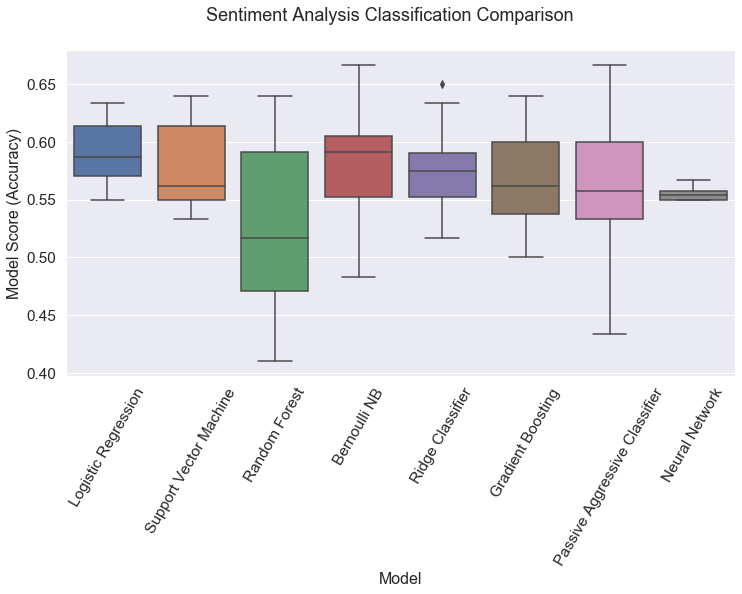

In [63]:
# list of classifiers to compare - use some additional models this time
clf_list = [("Logistic Regression", LogisticRegression(C=10.0, max_iter=100)),
            ("Support Vector Machine", SVC(kernel='linear', C=1.0)),
            ("Random Forest", RandomForestClassifier(n_estimators=300)),
            ("Bernoulli NB", BernoulliNB()),
            ("Ridge Classifier", RidgeClassifier()),
            ("Gradient Boosting", GradientBoostingClassifier()),
            ("Passive Aggressive Classifier", PassiveAggressiveClassifier(max_iter=80)),
            ("Neural Network", MLPClassifier(random_state=1, solver="adam", max_iter=100,  activation="logistic", hidden_layer_sizes=[10, 20, 10]))
           ]

# 

# calculate cross-validation scores and print / plot for each model accordingly
model_names, model_scores = multi_model_cross_validation(clf_list, x_train, y_train)
boxplot_comparison(model_names, model_scores)

In [43]:
def test_set_performances(clf_tuple_list, X_train, y_train, X_test, y_test, score_type='accuracy', print_results=True):
    
    model_names, model_accuracies, model_f1 = [], [], []
    
    if print_results:
        print("{0:<30} {1:<10} {2:<10} \n{3}".format("Model", "Accuracy", 
                                                     "F1-Score", "-"*50))
    
    # fit each model to training data and form predictions
    for name, model in clf_list:
        
        # fit on training, predict on test
        model.fit(X_train, y_train)
        y_preds = model.predict(X_test)
        
        # find accuracy and f1 (macro) scores
        accuracy = accuracy_score(y_test, y_preds)
        test_f1 = f1_score(y_test, y_preds, average='macro')
        
        # append model results
        model_names.append(name)
        model_accuracies.append(accuracy)
        model_f1.append(test_f1)
        
        if print_results:
            print("{0:<30} {1:<10.5f} {2:<10.5f}".format(name, accuracy, test_f1))
            
    return model_names, model_accuracies, model_f1

In [44]:
# obtain accuracy and f1 metrics and print for each model
model_names, test_acc, test_f1 = test_set_performances(clf_list, x_train, y_train, x_test, y_test)

Model                          Accuracy   F1-Score   
--------------------------------------------------
Logistic Regression            0.57912    0.56878   
Support Vector Machine         0.58249    0.56011   
Random Forest                  0.46465    0.45476   
Ridge Classifier               0.57576    0.56389   
Gradient Boosting              0.49158    0.48017   
Neural Network                 0.55556    0.35714   


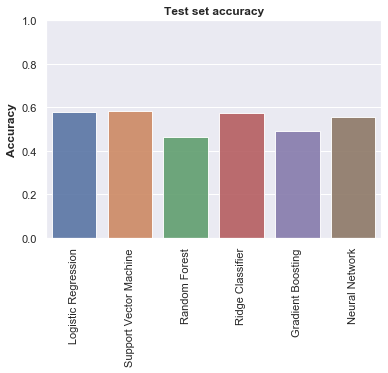

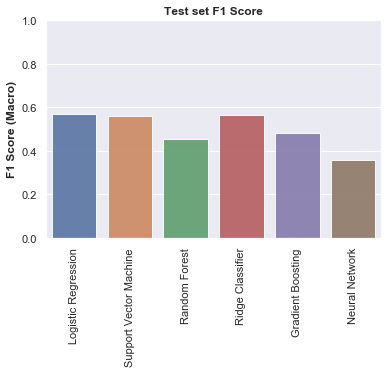

In [45]:
# barplot of model accuracies
sns.set(style="darkgrid")
sns.barplot(model_names, test_acc, alpha=0.9)
plt.title('Test set accuracy', weight='bold')
plt.ylabel('Accuracy', fontsize=12, weight='bold')
plt.xticks(rotation=90)
plt.ylim(0.0, 1.0)
plt.show()

# barplot of model f1 scores
sns.set(style="darkgrid")
sns.barplot(model_names, test_f1, alpha=0.9)
plt.title('Test set F1 Score', weight='bold')
plt.ylabel('F1 Score (Macro)', fontsize=12, weight='bold')
plt.xticks(rotation=90)
plt.ylim(0.0, 1.0)
plt.show()

### Visualising the results of a logistic regression model from above

In [46]:
def plot_confusion_matrix(true_y, pred_y, title='Confusion Matrix', figsize=(8,6)):
    conf_matrix = confusion_matrix(true_y, pred_y)
    conf_df = pd.DataFrame(conf_matrix, columns=np.unique(true_y), index = np.unique(true_y))
    conf_df.index.name = 'Actual'
    conf_df.columns.name = 'Predicted'
    plt.figure(figsize = figsize)
    plt.title(title)
    sns.set(font_scale=1.4)
    sns.heatmap(conf_df, cmap="Blues", annot=True, 
                annot_kws={"size": 16}, fmt='g')
    plt.show()

Samples incorrectly classified: 125 out of 297.
Logistic Regression classifier accuracy: 57.91%


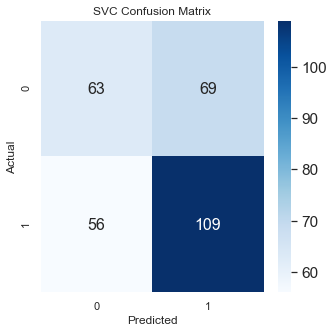

              precision    recall  f1-score   support

           0       0.53      0.48      0.50       132
           1       0.61      0.66      0.64       165

    accuracy                           0.58       297
   macro avg       0.57      0.57      0.57       297
weighted avg       0.58      0.58      0.58       297



In [47]:
# create a log reg classifier and predict using test set
lr_clf = LogisticRegression(C=10.0, max_iter=100)
lr_clf.fit(x_train, y_train)
predictions = lr_clf.predict(x_test)

# print performance statistics
print("Samples incorrectly classified: {0} out of {1}.".format((y_test != predictions).sum(), len(y_test)))

print("Logistic Regression classifier accuracy: {0:.2f}%".format(accuracy_score(predictions, y_test)*100.0))

# plot a confusion matrix of our results
plot_confusion_matrix(y_test, predictions, 
                      title="SVC Confusion Matrix", figsize=(5,5))

# print recall, precision and f1 score results
print(classification_report(y_test, predictions))

### Plot the Receiver Operating Characteristic (ROC) Curve for Logistic Regression Model

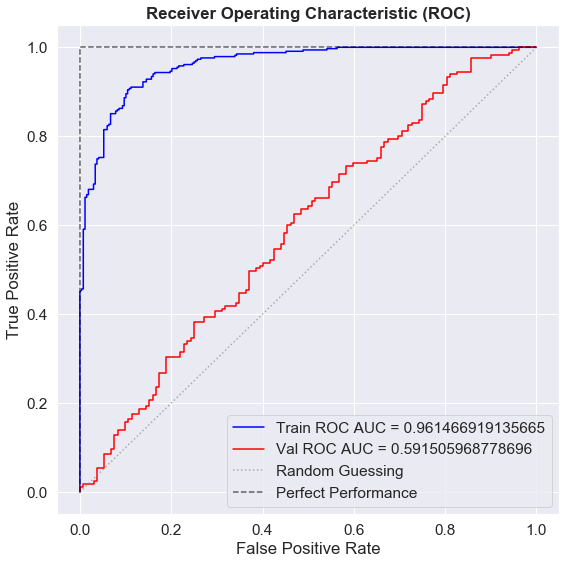

In [48]:
# obtain prediction probabilities for trg and val
y_val_probs = lr_clf.predict_proba(x_test)
y_trg_probs = lr_clf.predict_proba(x_train)

# obtain true positive and false positive rates for roc_auc
fpr, tpr, thresholds = roc_curve(y_train, y_trg_probs[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

# obtain true positive and false positive rates for roc_auc
val_fpr, val_tpr, val_thresholds = roc_curve(y_test, y_val_probs[:, 1], pos_label=1)
val_roc_auc = auc(val_fpr, val_tpr)

plt.figure(figsize=(9,9))
plt.plot(fpr, tpr, label=f"Train ROC AUC = {roc_auc}", color='blue')
plt.plot(val_fpr, val_tpr, label=f"Val ROC AUC = {val_roc_auc}", color='red')
plt.plot([0,1], [0, 1], label="Random Guessing", 
             linestyle=":", color='grey', alpha=0.6)
plt.plot([0, 0, 1], [0, 1, 1], label="Perfect Performance", 
             linestyle="--", color='black', alpha=0.6)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)", weight='bold')
plt.legend(loc='best')
plt.show()


In [57]:
from tensorflow.keras.callbacks import Callback
# Hyperparameters for title and text
vocab_size = 100000
embedding_dim_title = 128
max_length_title = 40
embedding_dim_text = 500
max_length_text = 500
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
test_ratio = .3
embedding_dim = 500
max_length_text = 500

In [53]:
# detect and init the TPU
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)

    # instantiate a distribution strategy
    tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)
    TPU_EXIST = True
except Exception as e:
    print(e)
    TPU_EXIST = False

Please provide a TPU Name to connect to.


In [54]:
# Create the model
def model_creation(vocab_size=vocab_size, embedding_dim=128):
    if TPU_EXIST:
        with tpu_strategy.scope():
            model = tf.keras.Sequential()
            model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim))
            model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)))
            model.add(tf.keras.layers.Dense(embedding_dim, activation='relu'))
            model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
            model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
    else:
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim))
        model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)))
        model.add(tf.keras.layers.Dense(embedding_dim, activation='relu'))
        model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
    return model

In [55]:
def train_model(model, train_X, train_Y, test_X, test_Y, epochs):
    class CustomCallback(Callback):
        def on_epoch_end(self, epoch, logs={}):
            if logs.get('acc') > 0.99:
                print(f'Accuracy reached {logs.get("acc")*100:0.2f}. Stopping the training')
                self.model.stop_training = True

    history = model.fit(train_X, train_Y,
                       epochs=epochs,
                       batch_size=64,
                       validation_data=[test_X, test_Y],
                       callbacks=[CustomCallback()])
    return history

In [58]:
# train_padded, test_padded, train_y, test_y = preprocessing(data, dependent_column='News', max_len=max_length_title)
model = model_creation(embedding_dim=embedding_dim_title)
history_title = train_model(model, x_train, y_train, x_test, y_test, 15)

Train on 603 samples, validate on 297 samples
Epoch 1/15
603/603 [==============================] - 37s 61ms/sample - loss: 0.6893 - acc: 0.5556 - val_loss: 0.6885 - val_acc: 0.5556
Epoch 2/15
603/603 [==============================] - 29s 49ms/sample - loss: 0.6870 - acc: 0.5556 - val_loss: 0.6875 - val_acc: 0.5556
Epoch 3/15
603/603 [==============================] - 29s 49ms/sample - loss: 0.6878 - acc: 0.5556 - val_loss: 0.6870 - val_acc: 0.5556
Epoch 4/15
603/603 [==============================] - 30s 49ms/sample - loss: 0.6872 - acc: 0.5556 - val_loss: 0.6871 - val_acc: 0.5556
Epoch 5/15
603/603 [==============================] - 31s 51ms/sample - loss: 0.6878 - acc: 0.5556 - val_loss: 0.6870 - val_acc: 0.5556
Epoch 6/15
603/603 [==============================] - 30s 49ms/sample - loss: 0.6874 - acc: 0.5556 - val_loss: 0.6870 - val_acc: 0.5556
Epoch 7/15
603/603 [==============================] - 31s 52ms/sample - loss: 0.6871 - acc: 0.5556 - val_loss: 0.6870 - val_acc: 0.5556
Ep

In [59]:
from collections import Counter

# Count unique words
def counter_word(text):
    count = Counter()
    for i in text.values:
        for word in i.split():
            count[word] += 1
    return count

In [60]:
text = news_dataset['News']

counter = counter_word(text)

In [61]:
len(counter)

20570

In [62]:
counter

Counter({'ترکی': 23,
         'کی': 9298,
         'جانب': 452,
         'سے': 6372,
         'ایران': 73,
         'تیل': 285,
         'خریداری': 14,
         'بالکل': 50,
         'ختم': 156,
         'ہوکر': 21,
         'رہ': 64,
         'گئی': 471,
         'ہے': 6012,
         'خریدنے': 23,
         'والی': 521,
         'ترک': 22,
         'آئل': 26,
         'کمپنی': 388,
         'توبراش': 2,
         'نے': 4409,
         'اکتوبر': 41,
         'میں': 10221,
         '1': 39,
         'لاکھ': 141,
         '29': 14,
         'ہزار': 143,
         'بیرل': 49,
         'خریدا': 19,
         'تھا': 996,
         'مگر': 134,
         'نومبر': 43,
         'یہ': 1918,
         'مقدار': 102,
         'صفر': 8,
         'رہی': 308,
         'تفصیلات': 51,
         'کے': 12505,
         'مطابق': 730,
         'ان': 1857,
         'آٹھ': 28,
         'ممالک': 213,
         'شامل': 255,
         'جنہیں': 34,
         'امریکا': 116,
         'تہران': 12,
         'پر': 3276,
         '

In [ ]:
max_length = 500
num_words = len(df_word_feature)

## Model Architecture
### Logistic Regression

### Linear_SVC

### Bernoulli NB

In [ ]:
# Train BernoulliNB() using Training Datasets

Brnuli_NB = BernoulliNB()
br_NB = Brnuli_NB.fit(x_train,np.ravel(y_train))

print("\nScore of Bernoulli NB:")
print("======================\n")

test_pred = br_NB.predict(x_test)
NB_acc = accuracy_score(y_test, test_pred)
NB_pre, NB_rec, NB_f1, _ = precision_recall_fscore_support(y_test, test_pred, average='macro')
print('Accuracy: ', NB_acc)
print('Precision: ', NB_pre)
print('Recall: ', NB_rec)
print('F1: ', NB_f1)

### Multinomial NB

In [ ]:
# Train MultinomialNB() using Training Datasets
multinomial_nb = MultinomialNB()
multi_NB = multinomial_nb.fit(x_train,np.ravel(y_train))

print("\nScore of Multinomial NB:")
print("========================\n")

test_pred = multi_NB.predict(x_test)
multi_NB_acc = accuracy_score(y_test, test_pred)
multi_NB_pre, multi_NB_rec, multi_NB_f1, _ = precision_recall_fscore_support(y_test, test_pred, average='macro')
print('Accuracy: ', multi_NB_acc)
print('Precision: ', multi_NB_pre)
print('Recall: ', multi_NB_rec)
print('F1: ', multi_NB_f1)

In [ ]:
### Neural Network
### MLP Classifier

### LSTM Classifier

In [ ]:
# importing neural network libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, GRU, LSTM, RNN, SpatialDropout1D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM


In [ ]:
len(df_word_feature)

In [ ]:
EMBEDDING_DIM=100
max_feature = max_features
model = Sequential()
model.add(Embedding(max_feature, EMBEDDING_DIM, input_length=500))
# model.add(SpatialDropout1D(0.2))
model.add(LSTM(64, dropout=0.1))
model.add(Dense(1, activation='sigmoid'))
optimizer = Adam(learning_rate=3e-4)

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

epochs = 5
batch_size = 64

history = model.fit(x_train, y_train, epochs=epochs,batch_size = batch_size ,validation_data=(x_test,y_test))


In [ ]:

test_pred=model.predict_classes(x_test)
lstm_acc1 = accuracy_score(y_test, test_pred)
lstm_pre, lstm_rec, lstm_f1, _ = precision_recall_fscore_support(y_test, test_pred, average='macro')

print("\nScore of LSTM Classifier:")
print("========================\n")

print('Accuracy: ', lstm_acc1)
print('Precision: ', lstm_pre)
print('Recall: ', lstm_rec)
print('F1: ', lstm_f1)


### Evaluations Results
#### Accuracy